<a href="https://colab.research.google.com/github/adyaan1989/Dog/blob/main/HR_Promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# for ploting
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
# feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [70]:
# load the dataset
train = pd.read_csv("/content/drive/MyDrive/HR_Promotion/train.csv")
#test = pd.read_csv("/content/drive/MyDrive/HR_Promotion/test.csv")


In [71]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


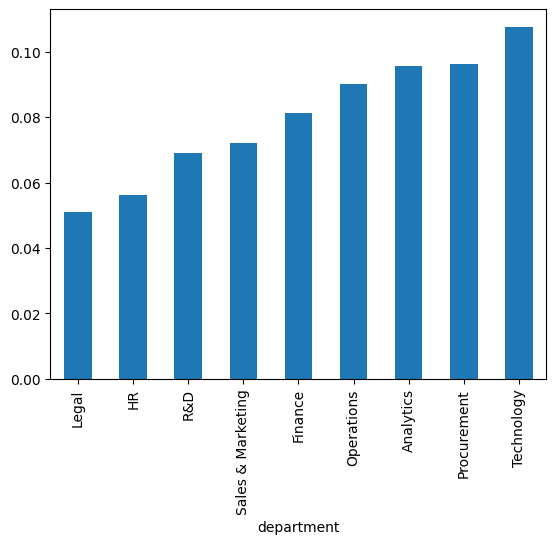

In [72]:
# now let's check prmotion department wise
train.groupby(['department'])['is_promoted'].mean().sort_values().plot.bar();

<Axes: xlabel='awards_won?'>

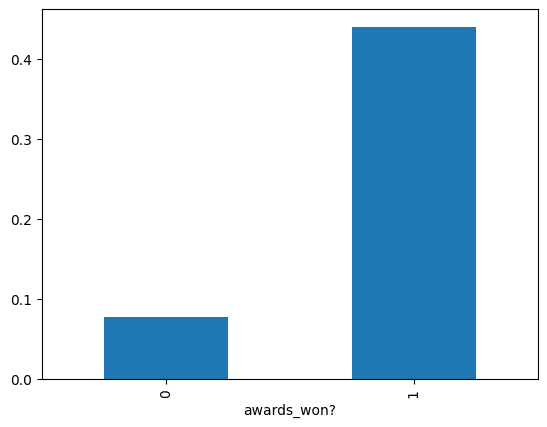

In [73]:
train.groupby(['awards_won?'])['is_promoted'].mean().sort_values().plot.bar()

<Axes: xlabel='education'>

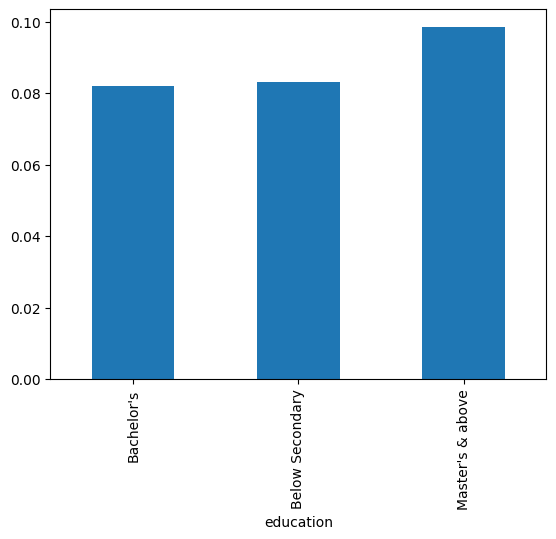

In [74]:
train.groupby(['education'])['is_promoted'].mean().sort_values().plot.bar()

<Axes: xlabel='KPIs_met >80%'>

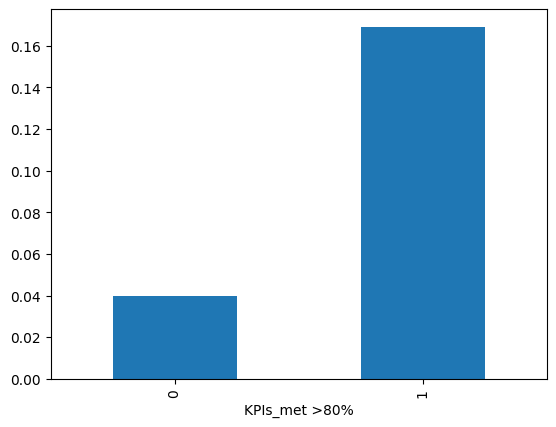

In [75]:
train.groupby(['KPIs_met >80%'])['is_promoted'].mean().sort_values().plot.bar()

<Axes: xlabel='recruitment_channel'>

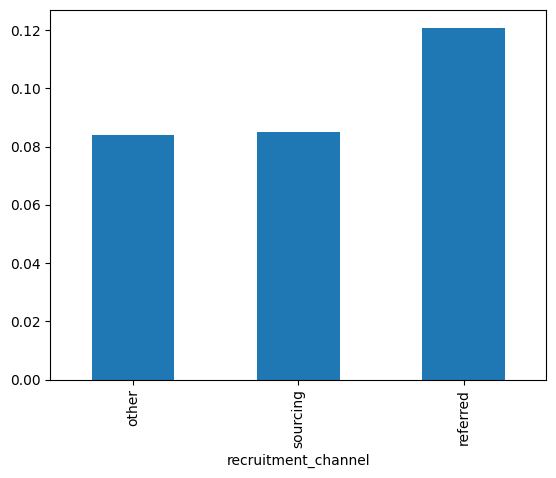

In [76]:
train.groupby(['recruitment_channel'])['is_promoted'].mean().sort_values().plot.bar()

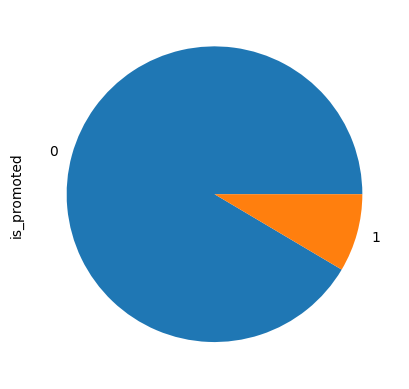

In [77]:
train['is_promoted'].value_counts().plot.pie();


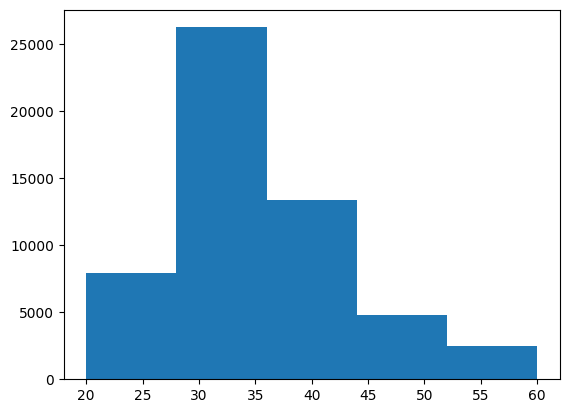

In [78]:
plt.hist(train['age'], bins=5);

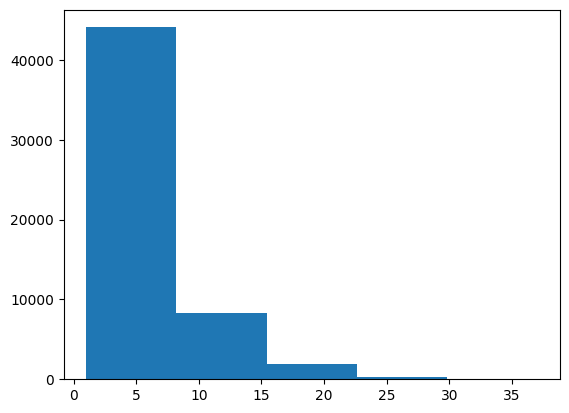

In [79]:
#plt.subplot(1, 3, 2)
fig = plt.hist(train['length_of_service'], bins=5)


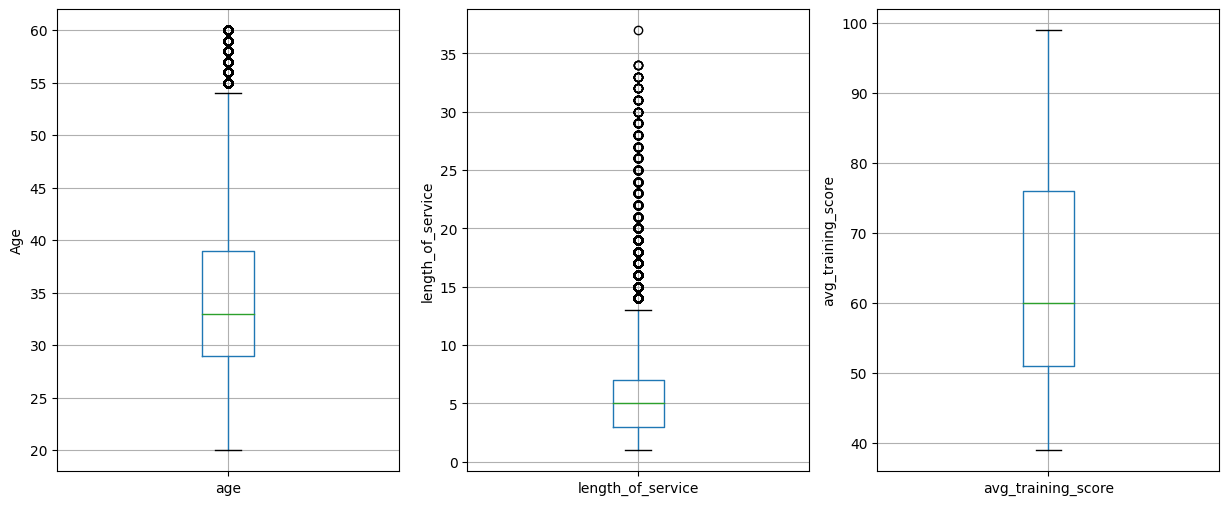

In [80]:
# let's make boxplots to visualise outliers in the continuous variables
# Age, length_of_service and avg_training_score

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
fig = train.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 3, 2)
fig = train.boxplot(column='length_of_service')
fig.set_title('')
fig.set_ylabel('length_of_service')

plt.subplot(1, 3, 3)
fig = train.boxplot(column='avg_training_score')
fig.set_title('')
fig.set_ylabel('avg_training_score');



In [81]:
# find outliers

# Age
upper_boundary = train.age.mean() + 3* train.age.std()
lower_boundary = train.age.mean() - 3* train.age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary = lower_boundary, upperboundary = upper_boundary))

# Lenght of service
IQR = train.length_of_service.quantile(0.75) - train.length_of_service.quantile(0.25)
lower_fence = train.length_of_service.quantile(0.25) - (IQR * 3)
upper_fence = train.length_of_service.quantile(0.75) + (IQR * 3)
print('Lenght of Service are values < {lowerboundary} or >{upperboundary}'.format(lowerboundary = lower_fence, upperboundary = upper_fence))

Age outliers are values < 11.823407882033777 or > 57.78442309154673
Lenght of Service are values < -9.0 or >19.0


In [82]:
# outlies in discrete variables
for var in ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%','awards_won?']:
    print(train[var].value_counts() / np.float(len(train)))

1     0.809699
2     0.145727
3     0.032404
4     0.008539
5     0.002335
6     0.000803
7     0.000219
8     0.000091
10    0.000091
9     0.000091
Name: no_of_trainings, dtype: float64
3.0    0.339695
5.0    0.214221
4.0    0.180211
1.0    0.113542
2.0    0.077087
Name: previous_year_rating, dtype: float64
0    0.648026
1    0.351974
Name: KPIs_met >80%, dtype: float64
0    0.976828
1    0.023172
Name: awards_won?, dtype: float64


<ipython-input-82-6d5e1254e041>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train[var].value_counts() / np.float(len(train)))
<ipython-input-82-6d5e1254e041>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train[var].value_counts() / np.float(len(train)))
<ipython-input-82-6d5e1254e041>:3: DeprecationWarning: `np.float` 

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


There are a mixture of categorical and numerical variables. Numerical are those of type int and float. Categorical those of type object.

In [84]:
print('Number of employees labels:', len(train.employee_id.unique()))
print('Number of employees in promoted data:', len(train))

Number of employees labels: 54808
Number of employees in promoted data: 54808


In [85]:
# find the numarical variables
numerical = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 9 numerical variables


In [86]:
# find the categorical variables
categorical = [var for var in train.columns if train[var].dtype=='O']
print('Train dataset have {} categorical variables'.format(len(categorical)))

# categorical_test = [var for var in X_test.columns if X_test[var].dtype=='O']
# print('Test dataset have {} categorical variables'.format(len(categorical_test)))


Train dataset have 5 categorical variables


In [87]:
cat = pd.get_dummies(train[categorical], drop_first=True)
#cat_test = pd.get_dummies(X_test[categorical_test],drop_first=True)

train = pd.concat([train,cat],axis=1)
#X_test = pd.concat([X_test,cat_test],axis=1)


In [88]:
train.shape

(54808, 60)

In [89]:
train = train.drop(categorical, axis=1)
#X_test = X_test.drop(cat_test, axis=1)


In [90]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [91]:
#make the it X and y
X = train.drop(['is_promoted'], axis=1)
y = train['is_promoted']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train.shape, X_train.shape, X_test.shape, y_test.shape

((43846, 54), (43846, 54), (10962, 54), (10962,))

In [92]:
X_test.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
47235,30698,1,24,4.0,2,1,0,54,0,0,...,0,0,0,0,0,0,0,1,0,0
86,20798,1,28,2.0,6,0,0,52,0,1,...,0,0,0,0,0,0,0,0,0,1
13878,24587,1,32,4.0,8,0,0,60,0,0,...,0,0,0,0,0,0,1,0,0,1
12473,22150,2,25,1.0,2,0,0,47,0,0,...,0,0,0,0,1,0,0,1,0,0
53518,47553,1,26,2.0,2,0,0,58,0,0,...,0,0,0,0,0,0,0,1,0,1


In [93]:
# let's visualise the percentage of missing values
X_train.isnull().mean()

employee_id                     0.000000
no_of_trainings                 0.000000
age                             0.000000
previous_year_rating            0.074146
length_of_service               0.000000
KPIs_met >80%                   0.000000
awards_won?                     0.000000
avg_training_score              0.000000
department_Finance              0.000000
department_HR                   0.000000
department_Legal                0.000000
department_Operations           0.000000
department_Procurement          0.000000
department_R&D                  0.000000
department_Sales & Marketing    0.000000
department_Technology           0.000000
region_region_10                0.000000
region_region_11                0.000000
region_region_12                0.000000
region_region_13                0.000000
region_region_14                0.000000
region_region_15                0.000000
region_region_16                0.000000
region_region_17                0.000000
region_region_18

In [94]:
# print variables with missing data
X_train.isnull().mean()

employee_id                     0.000000
no_of_trainings                 0.000000
age                             0.000000
previous_year_rating            0.074146
length_of_service               0.000000
KPIs_met >80%                   0.000000
awards_won?                     0.000000
avg_training_score              0.000000
department_Finance              0.000000
department_HR                   0.000000
department_Legal                0.000000
department_Operations           0.000000
department_Procurement          0.000000
department_R&D                  0.000000
department_Sales & Marketing    0.000000
department_Technology           0.000000
region_region_10                0.000000
region_region_11                0.000000
region_region_12                0.000000
region_region_13                0.000000
region_region_14                0.000000
region_region_15                0.000000
region_region_16                0.000000
region_region_17                0.000000
region_region_18

In [95]:
# #  replace by most frequent label in Education

# for df in [train, test]:
#     df['education'].fillna(train['education'].mode()[0], inplace=True)


In [96]:
# # check absence of null values
# train.isnull().mean(), # check absence of null values


In [97]:
# test.isnull().mean()

In [98]:
#previous_year_rating

extrem = X_train.previous_year_rating.mean() + X_train.previous_year_rating.std()*3
for df in [X_train, X_test]:
    df.previous_year_rating.fillna(extrem, inplace=True)



In [99]:
X_train.isnull().mean()

employee_id                     0.0
no_of_trainings                 0.0
age                             0.0
previous_year_rating            0.0
length_of_service               0.0
KPIs_met >80%                   0.0
awards_won?                     0.0
avg_training_score              0.0
department_Finance              0.0
department_HR                   0.0
department_Legal                0.0
department_Operations           0.0
department_Procurement          0.0
department_R&D                  0.0
department_Sales & Marketing    0.0
department_Technology           0.0
region_region_10                0.0
region_region_11                0.0
region_region_12                0.0
region_region_13                0.0
region_region_14                0.0
region_region_15                0.0
region_region_16                0.0
region_region_17                0.0
region_region_18                0.0
region_region_19                0.0
region_region_2                 0.0
region_region_20            

In [100]:
X_test.isnull().mean()

employee_id                     0.0
no_of_trainings                 0.0
age                             0.0
previous_year_rating            0.0
length_of_service               0.0
KPIs_met >80%                   0.0
awards_won?                     0.0
avg_training_score              0.0
department_Finance              0.0
department_HR                   0.0
department_Legal                0.0
department_Operations           0.0
department_Procurement          0.0
department_R&D                  0.0
department_Sales & Marketing    0.0
department_Technology           0.0
region_region_10                0.0
region_region_11                0.0
region_region_12                0.0
region_region_13                0.0
region_region_14                0.0
region_region_15                0.0
region_region_16                0.0
region_region_17                0.0
region_region_18                0.0
region_region_19                0.0
region_region_2                 0.0
region_region_20            

In [101]:
# def encode_categorical_variables(var, target):
#         # make label to risk dictionary
#         ordered_labels = train.groupby([var])[target].mean().to_dict()

#         # encode variables
#         train[var] = train[var].map(ordered_labels)
#         test[var] = test[var].map(ordered_labels)
#         #submission[var] = submission[var].map(ordered_labels)

# # enccode labels in categorical vars
# for var in categorical:
#     encode_categorical_variables(var, 'is_promoted')

In [102]:
### Feature scaling
variables_that_need_scaling = ['department','previous_year_rating','KPIs_met >80%','no_of_trainings', 'age','awards_won?', 'length_of_service','avg_training_score','region_numerical']

In [103]:
# fit scaler
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [105]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=54,activation='relu'))
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=9,activation='relu'))
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [106]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
2938/2938 [==============================] - 15s 5ms/step - loss: 0.7185 - accuracy: 0.8968 - val_loss: 0.5032 - val_accuracy: 0.8591
Epoch 2/10
2938/2938 [==============================] - 13s 4ms/step - loss: 0.4703 - accuracy: 0.9049 - val_loss: 0.4479 - val_accuracy: 0.9114
Epoch 3/10
2938/2938 [==============================] - 21s 7ms/step - loss: 0.3765 - accuracy: 0.9145 - val_loss: 0.3237 - val_accuracy: 0.9183
Epoch 4/10
2938/2938 [==============================] - 14s 5ms/step - loss: 0.3043 - accuracy: 0.9189 - val_loss: 0.2779 - val_accuracy: 0.9200
Epoch 5/10
2938/2938 [==============================] - 13s 4ms/step - loss: 0.2659 - accuracy: 0.9225 - val_loss: 0.2777 - val_accuracy: 0.9239
Epoch 6/10
2938/2938 [==============================] - 13s 5ms/step - loss: 0.2508 - accuracy: 0.9300 - val_loss: 0.2798 - val_accuracy: 0.9319
Epoch 7/10
2938/2938 [==============================] - 13s 4ms/step - loss: 0.2452 - accuracy: 0.9340 - val_loss: 0.2403 - val_ac

In [108]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


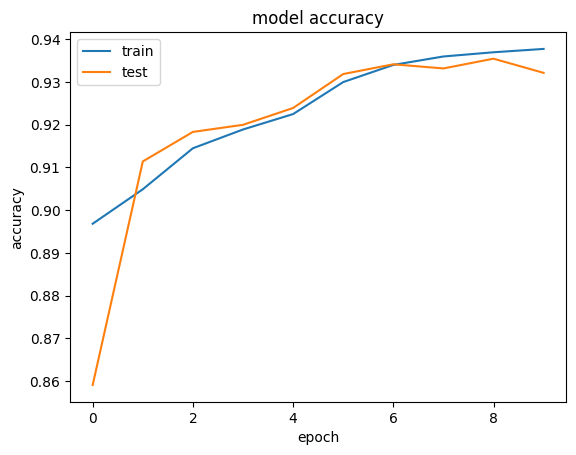

In [109]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

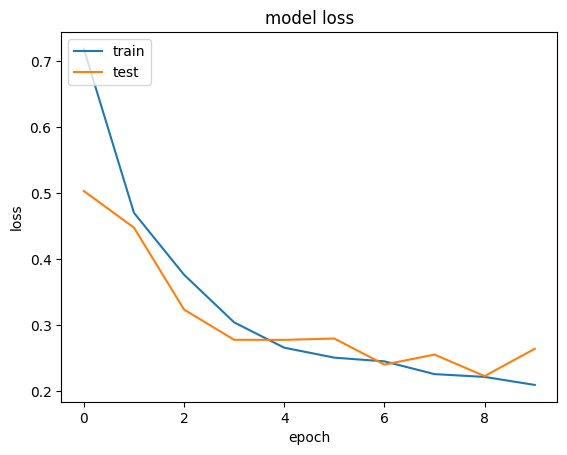

In [110]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

343/343 [==============================] - 1s 1ms/step


In [112]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10056,     9],
       [  691,   206]])

In [113]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9361430395913155

In [114]:
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(units=54,activation='relu'))
# Adding the input layer and the first hidden layer
model.add(Dense(units=11,activation='relu'))
# Adding the input layer and the first hidden layer
model.add(Dense(units=1,activation='relu'))

In [115]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.00026)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
earlyStop = tf.keras.callbacks.EarlyStopping(

    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [117]:
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100, callbacks=earlyStop)

Epoch 1/100
2938/2938 [==============================] - 16s 5ms/step - loss: 1.3175 - accuracy: 0.9135 - val_loss: 1.2885 - val_accuracy: 0.9141
Epoch 2/100
2938/2938 [==============================] - 13s 4ms/step - loss: 1.2962 - accuracy: 0.9136 - val_loss: 1.2086 - val_accuracy: 0.9126
Epoch 3/100
2938/2938 [==============================] - 13s 5ms/step - loss: 1.0141 - accuracy: 0.9032 - val_loss: 0.6796 - val_accuracy: 0.8820
Epoch 4/100
2938/2938 [==============================] - 13s 4ms/step - loss: 0.6091 - accuracy: 0.8962 - val_loss: 0.5578 - val_accuracy: 0.9070
Epoch 5/100
2938/2938 [==============================] - 14s 5ms/step - loss: 0.5123 - accuracy: 0.9100 - val_loss: 0.4501 - val_accuracy: 0.9118
Epoch 6/100
2938/2938 [==============================] - 13s 4ms/step - loss: 0.4429 - accuracy: 0.9090 - val_loss: 0.4001 - val_accuracy: 0.9051
Epoch 7/100
2938/2938 [==============================] - 13s 5ms/step - loss: 0.4034 - accuracy: 0.9099 - val_loss: 0.4129 -

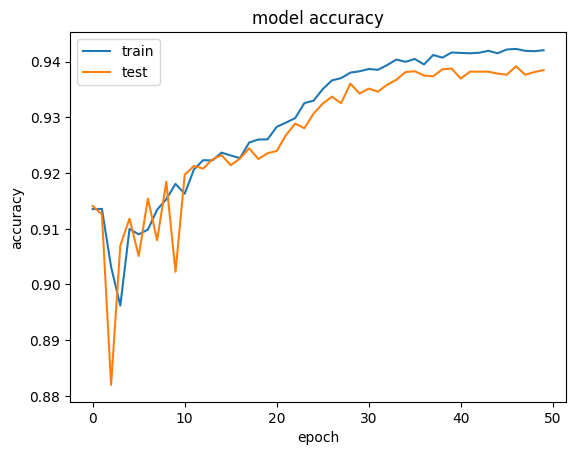

In [118]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

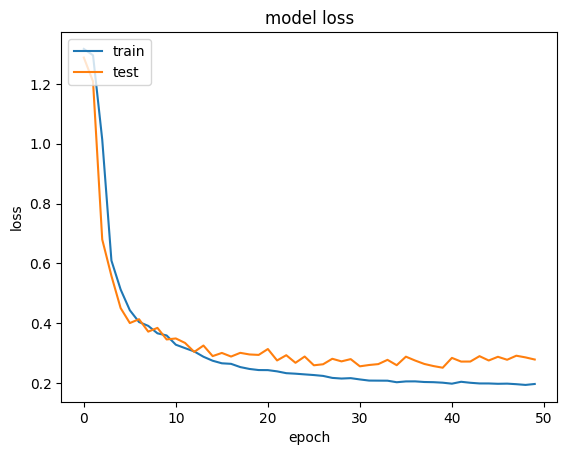

In [119]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

343/343 [==============================] - 1s 2ms/step


array([[10001,    64],
       [  613,   284]])

In [121]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9382411968618866